In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df=pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [58]:
#taking target column in y
y = df.loc[:,['Species']].values

#removing unnecessary columns
df=df.drop(['Id','Species'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
from sklearn.preprocessing import StandardScaler
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data = principalComponents)
pdf.head()

,0,1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


Text(0.5, 1.0, 'PCA')

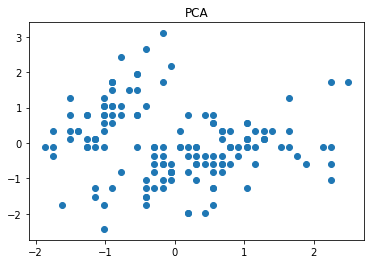

In [61]:
# Plot the training points
plt.scatter(x[:, 0], x[:, 1])
plt.title("PCA")

Text(0.5, 1.0, 'K-means Plot')

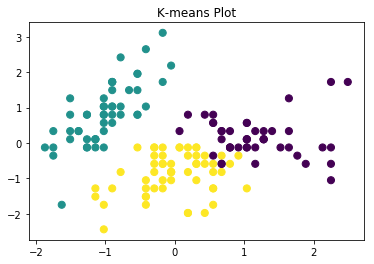

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("K-means Plot")

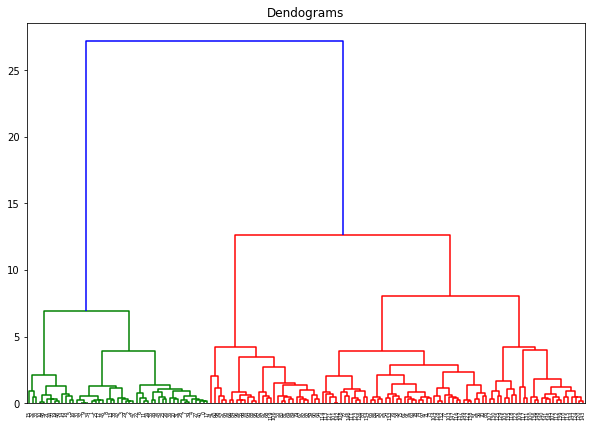

In [63]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [64]:
from pyclustertend import hopkins
t=hopkins(x,150)
t=1-t
print("Hopkins Constant:",t)

Hopkins Constant: 0.8167404830034635
